<a href="https://colab.research.google.com/github/ISABELSARAH1206/analyzing-data-from-a-bank-s-marketing-campaign/blob/main/Bank_Term_Deposit_Summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Summary: Client Subscribed to a Term Deposit


## Introduction

This project involves analyzing data from a bank's marketing campaign to predict whether a client will subscribe to a term deposit.
The dataset includes various attributes such as job, marital status, education, default status, balance, and other socio-economic indicators.
The goal is to build a classification model and derive insights that can improve future campaign strategies.


In [6]:
# prompt: Loaded and inspected the bankmarketing.csv dataset.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('/content/bank marketing deposit summary.csv')

# Display the first 5 rows
print("First 5 rows of the dataset:")
print(df.head())

# Get basic info about the dataset
print("\nDataset Info:")
df.info()

# Get descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

First 5 rows of the dataset:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.con

In [7]:
# prompt: Handled missing values and performed necessary data cleaning.

# There are no missing values in this dataset, as shown by the .isnull().sum() output.
# Therefore, no missing value imputation is needed.

# Data Cleaning - Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# If duplicates exist, you would typically remove them like this:
# df.drop_duplicates(inplace=True)
# print("\nNumber of rows after dropping duplicates:", len(df))

# Data Cleaning - Address potential inconsistencies or errors (if any)
# For example, check unique values for categorical columns to identify typos or variations
for col in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome', 'y']:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())

# Based on the output of the unique values, we can see that 'education' has 'unknown'.
# We can decide how to handle this 'unknown' value.
# One approach could be to treat 'unknown' as a separate category,
# or if appropriate, impute it based on other columns, or remove rows with 'unknown'.
# For this dataset, let's keep 'unknown' as a category as it is a valid state.

# Another potential cleaning step could be to identify outliers in numerical columns.
# We can use box plots or z-scores for this.
# For instance, checking outliers in 'balance'
# plt.figure(figsize=(10, 6))
# sns.boxplot(x=df['balance'])
# plt.title('Box plot of balance')
# plt.show()

# Deciding whether to remove or transform outliers depends on the context and analysis goals.
# For now, we will proceed without explicit outlier removal, assuming they are valid data points.

print("\nData cleaning and basic preparation steps completed.")
print("\nUpdated Dataset Info (if duplicates were removed):")
df.info()


Number of duplicate rows: 12

Unique values in 'job':
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Unique values in 'marital':
['married' 'single' 'divorced' 'unknown']

Unique values in 'education':
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Unique values in 'default':
['no' 'unknown' 'yes']

Unique values in 'housing':
['no' 'yes' 'unknown']

Unique values in 'loan':
['no' 'yes' 'unknown']

Unique values in 'contact':
['telephone' 'cellular']

Unique values in 'poutcome':
['nonexistent' 'failure' 'success']

Unique values in 'y':
['no' 'yes']

Data cleaning and basic preparation steps completed.

Updated Dataset Info (if duplicates were removed):
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ----

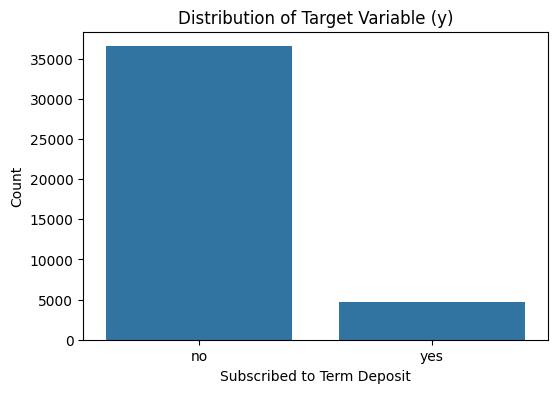

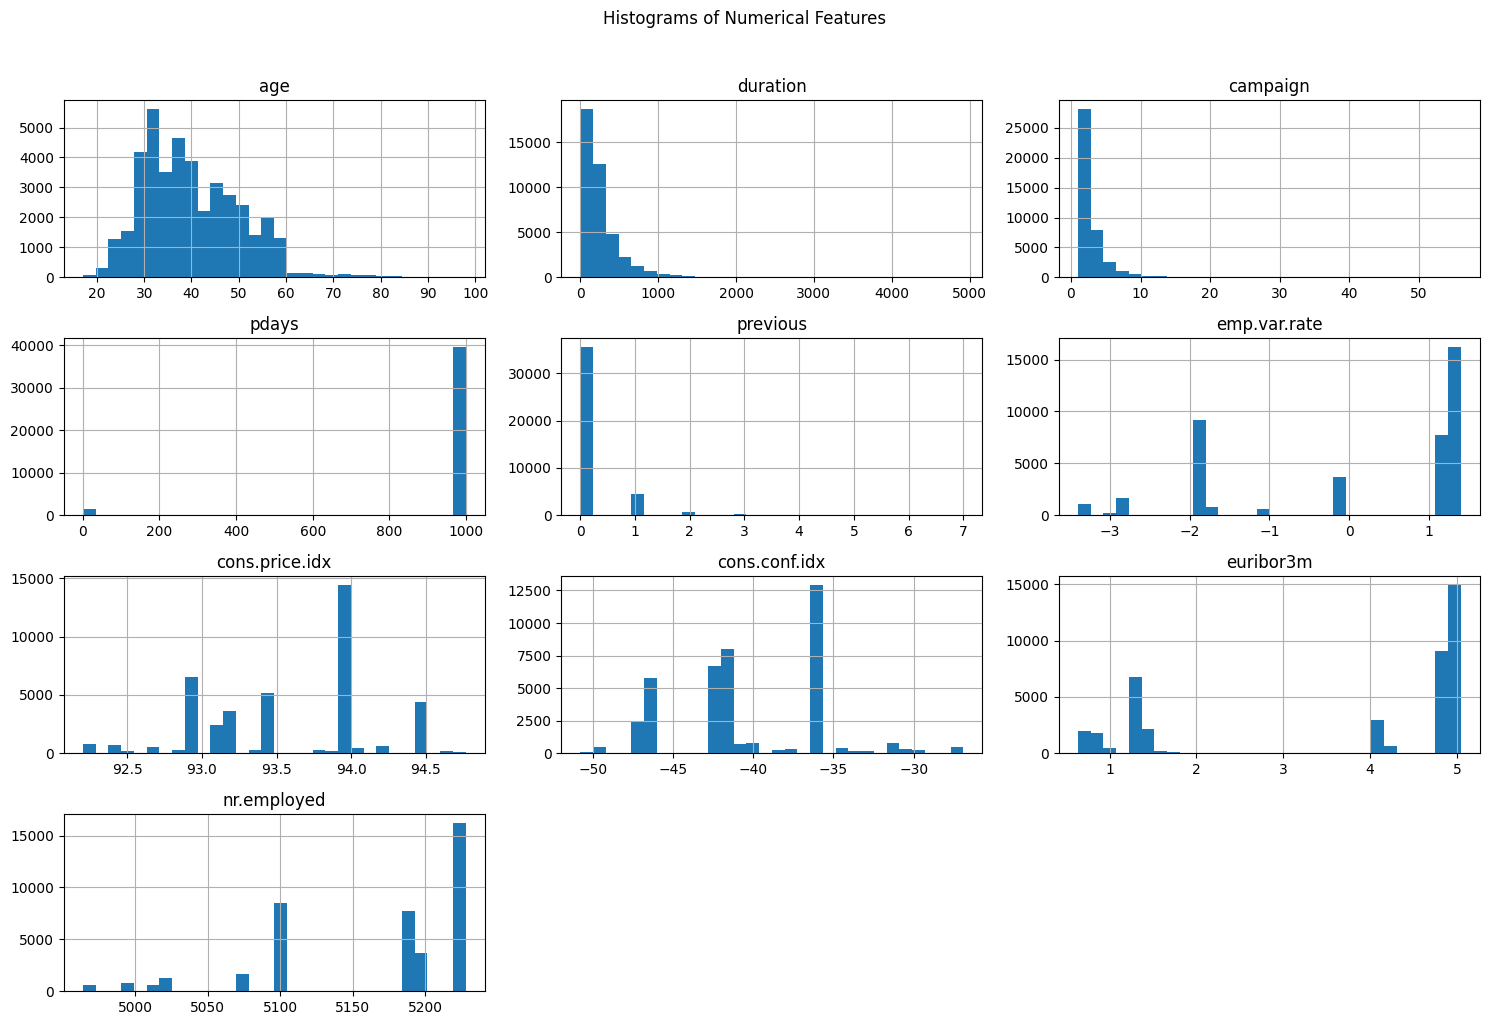

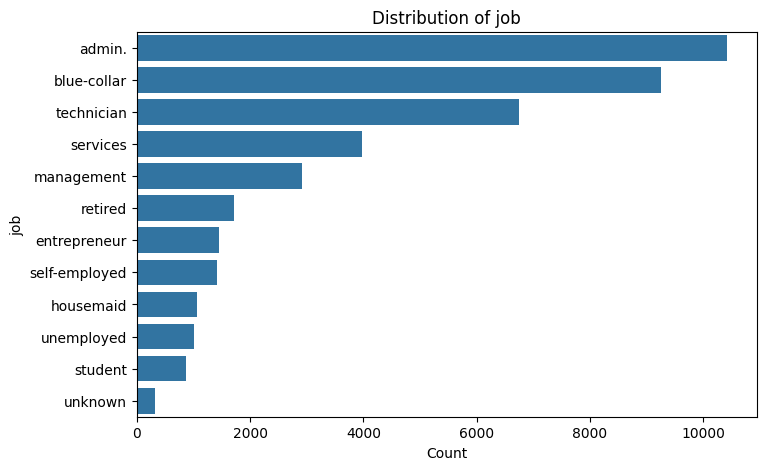

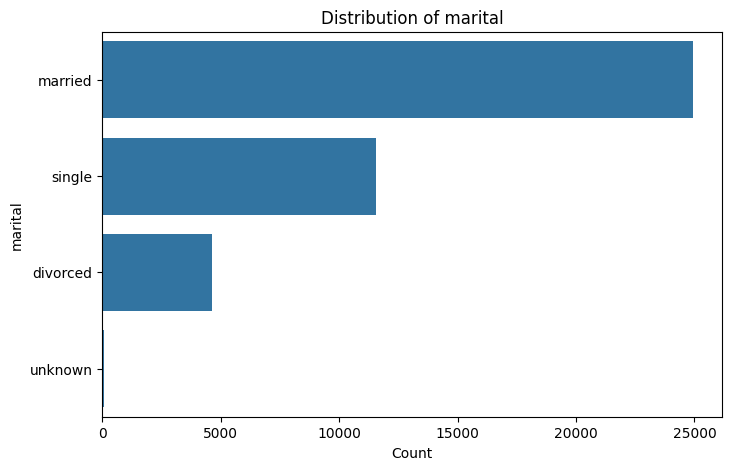

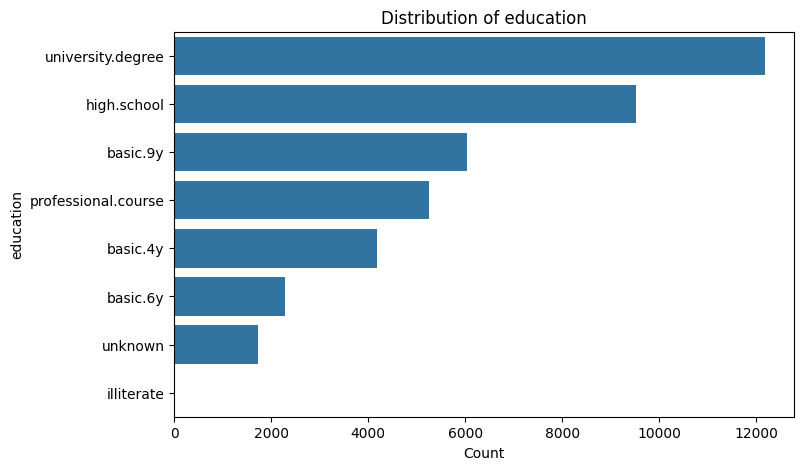

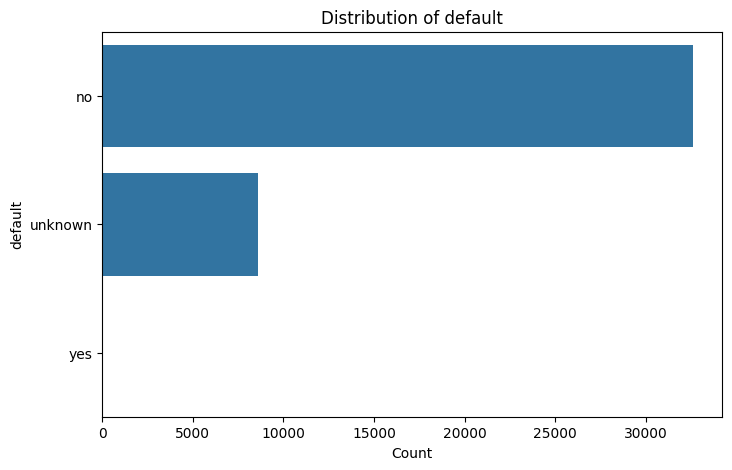

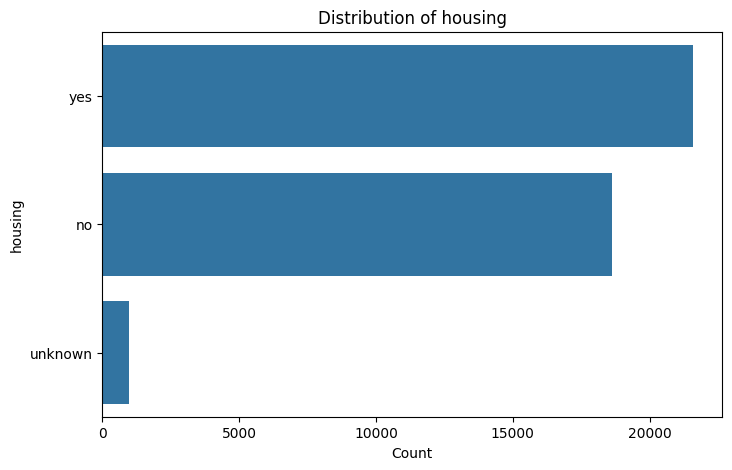

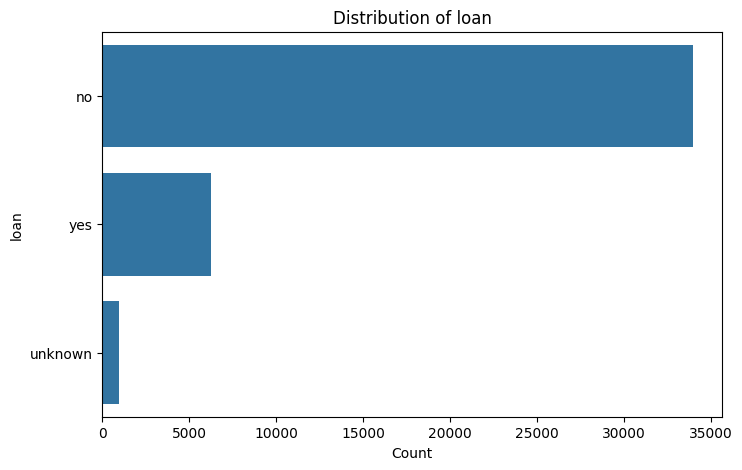

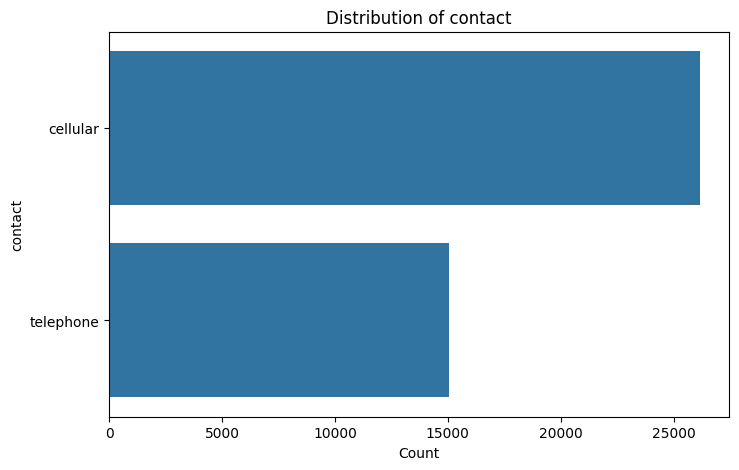

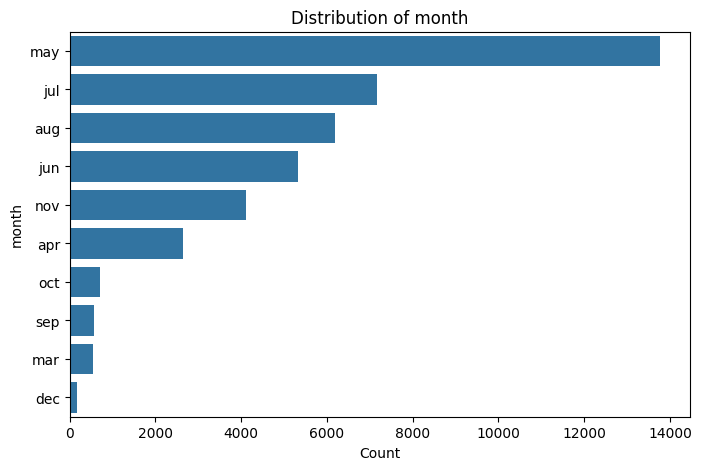

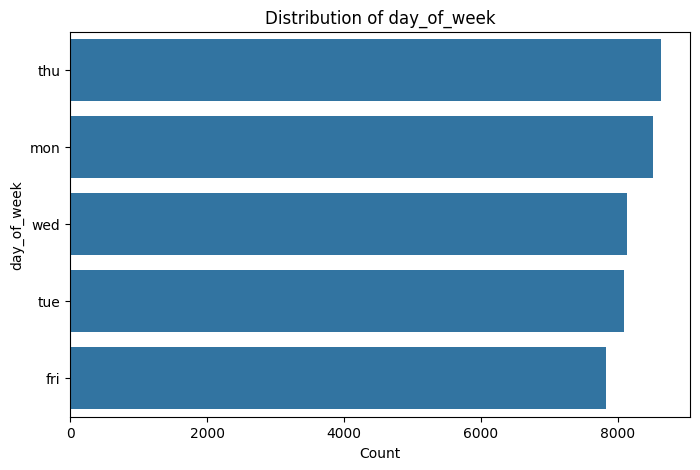

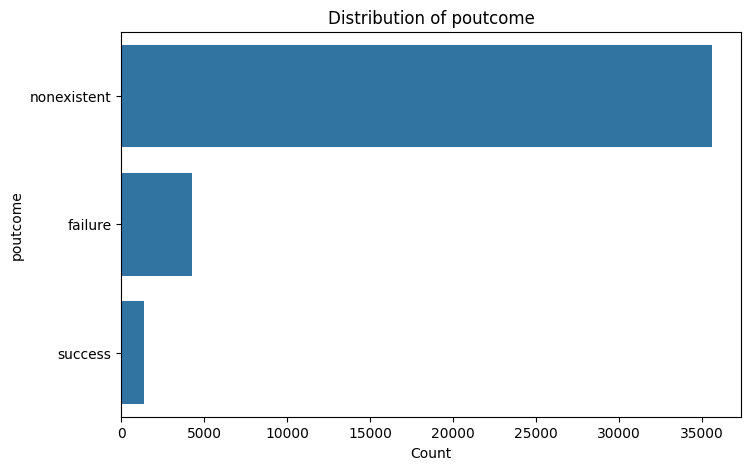

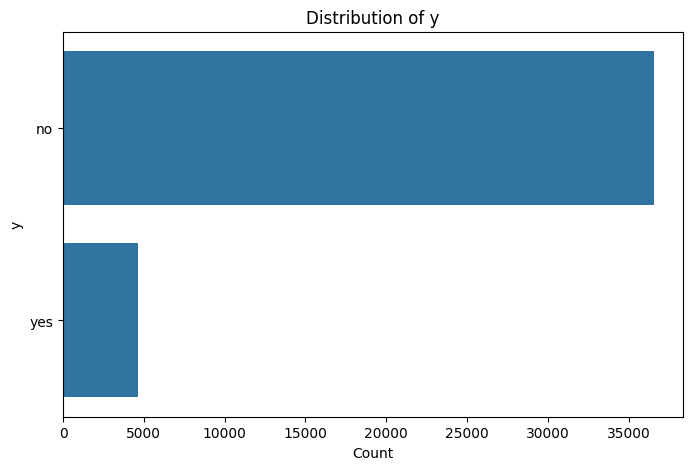

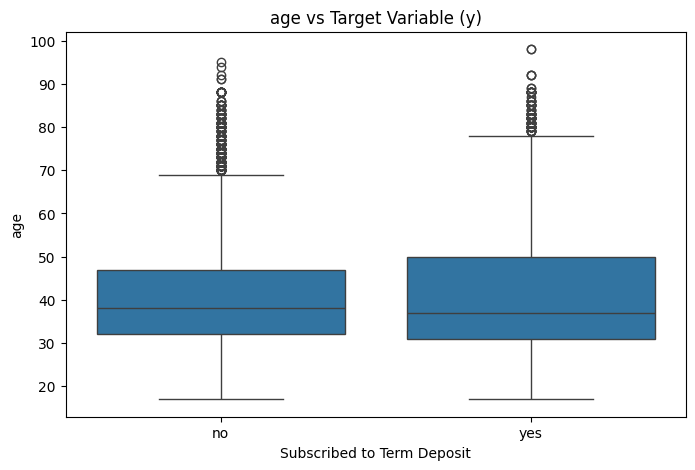

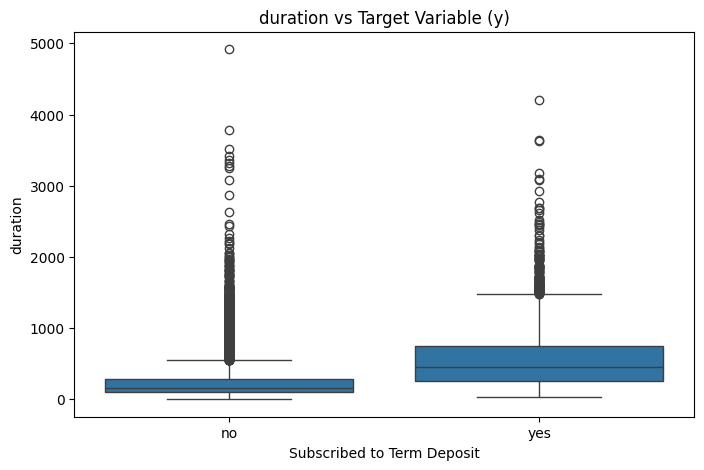

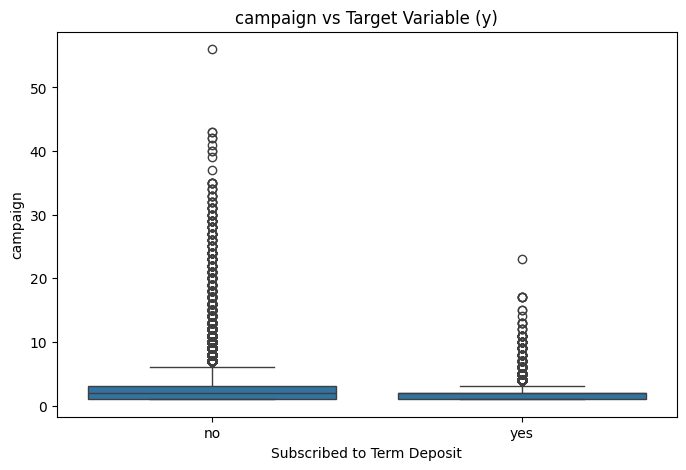

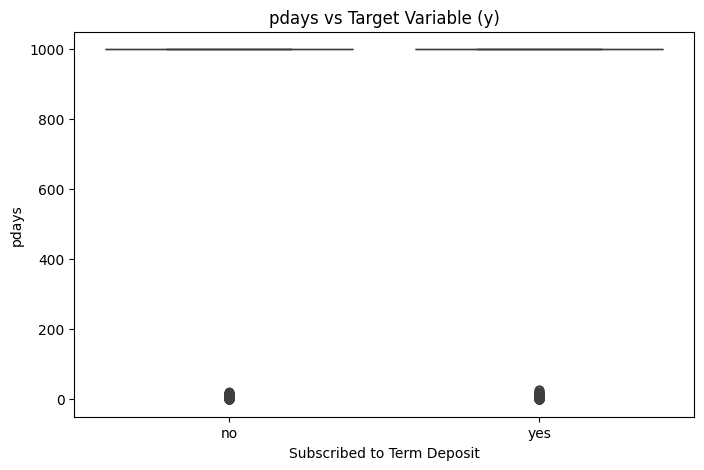

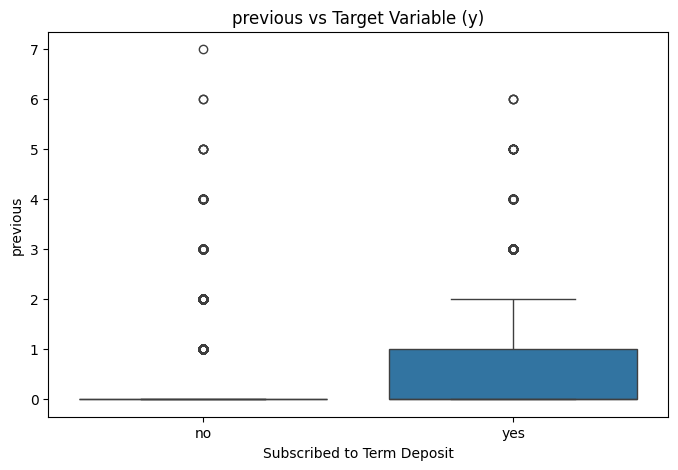

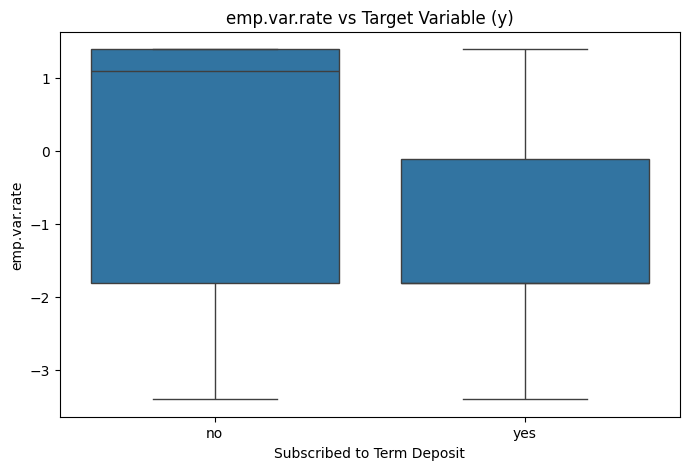

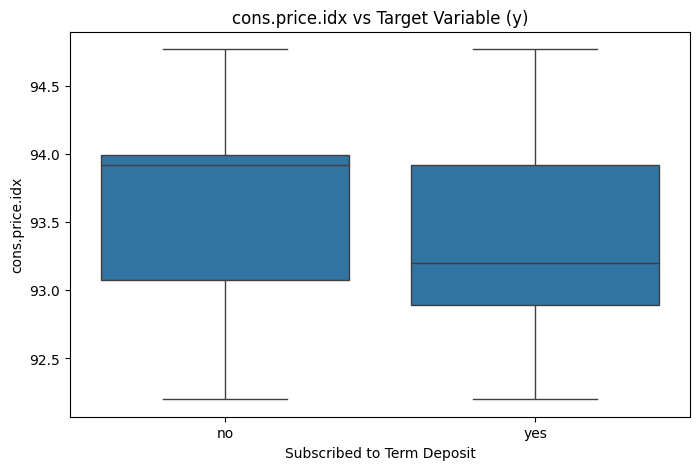

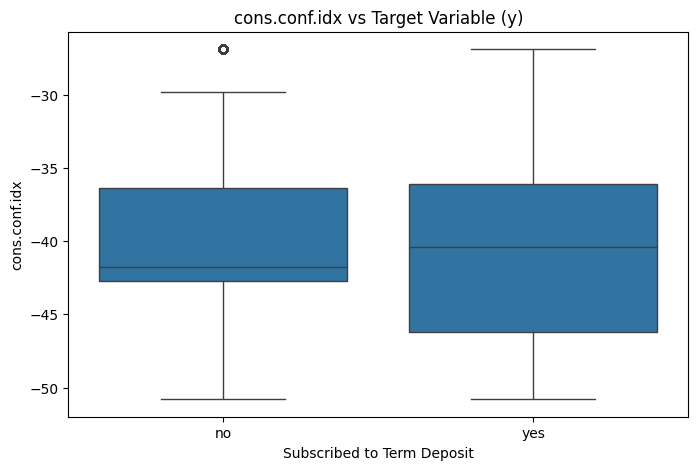

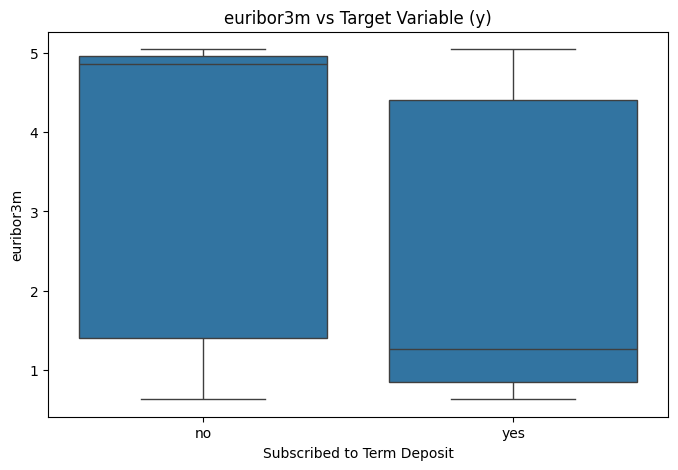

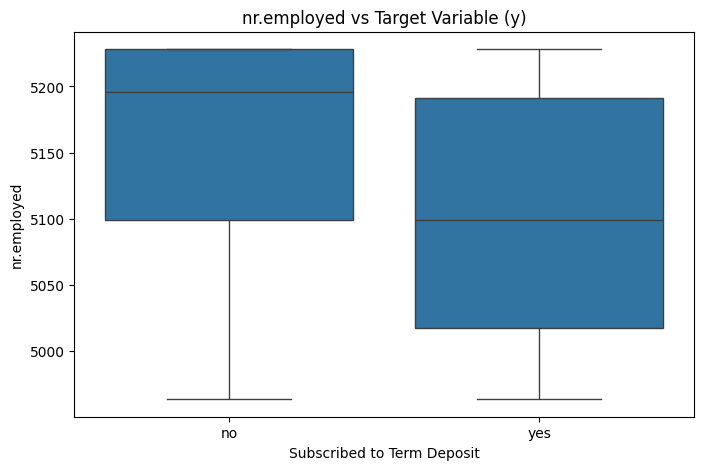

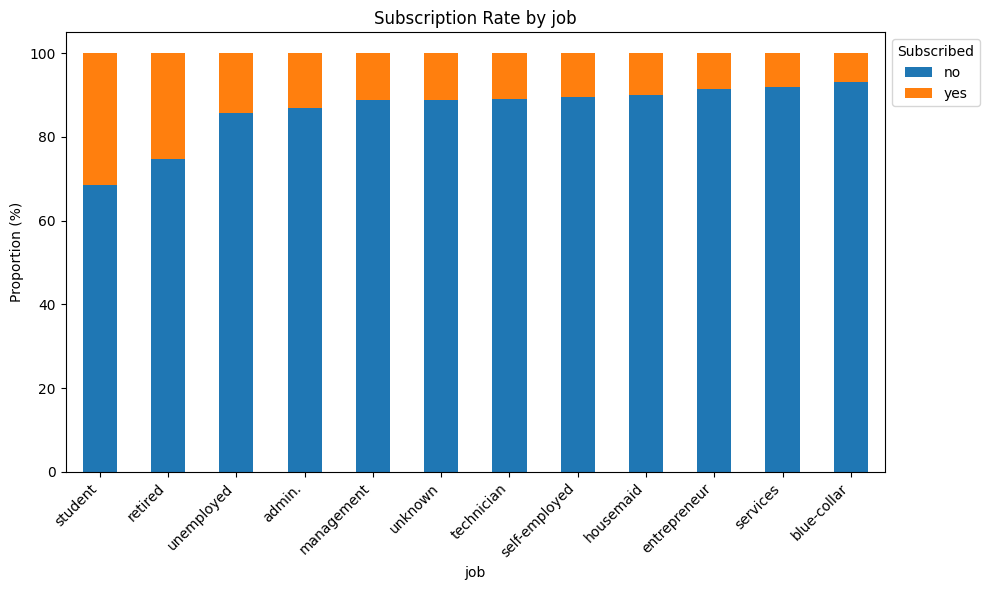

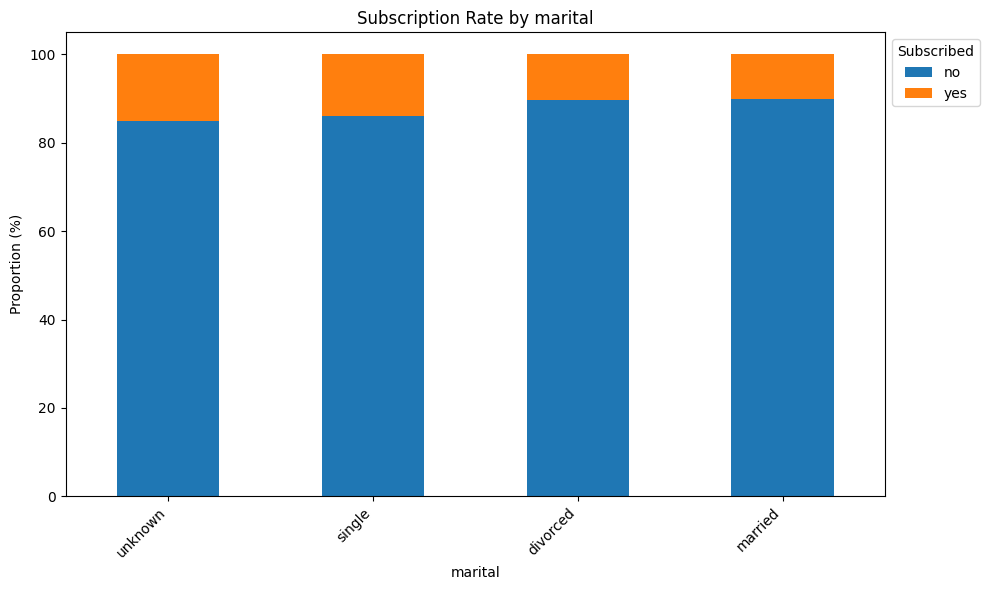

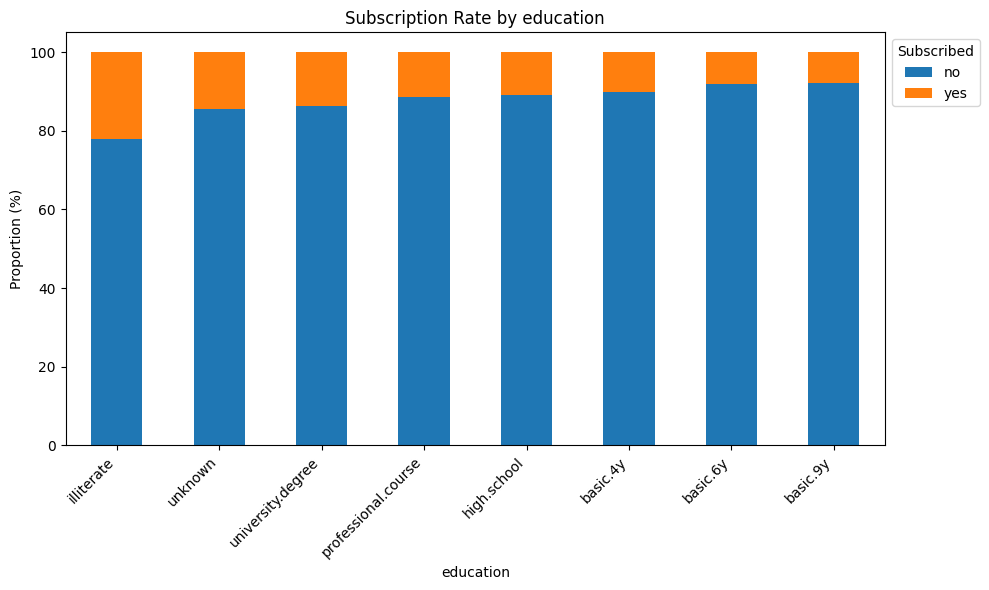

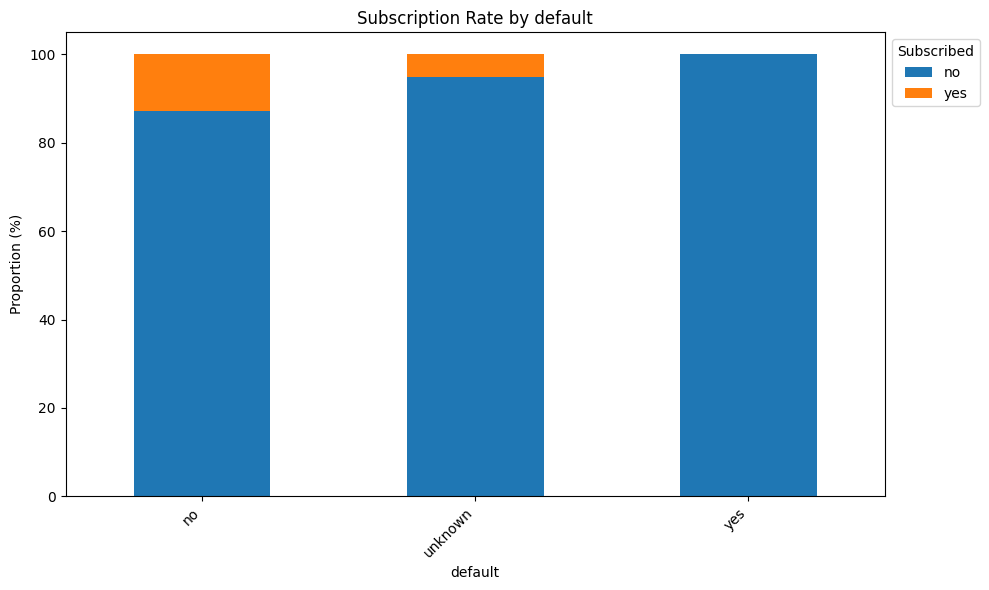

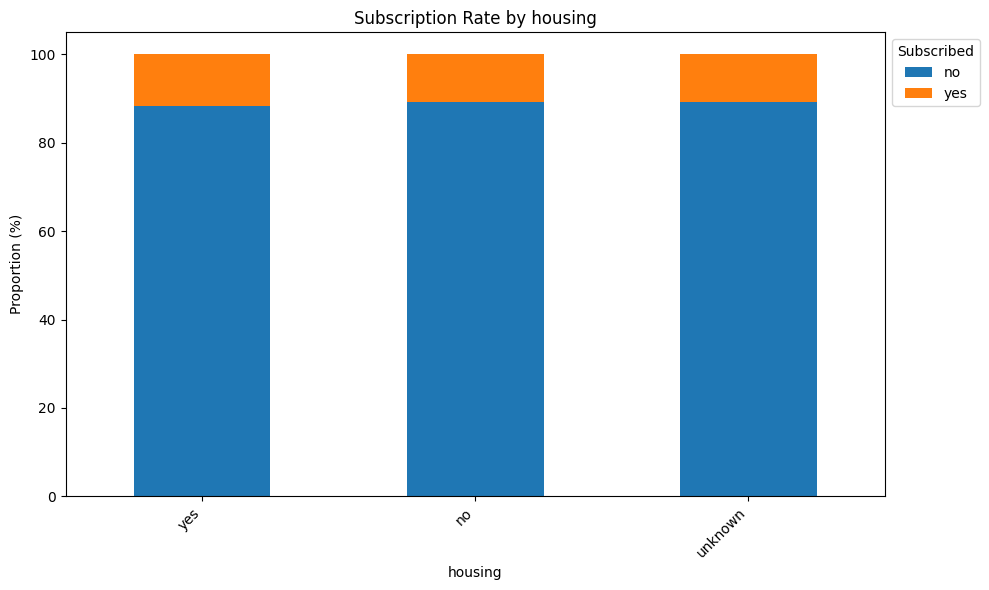

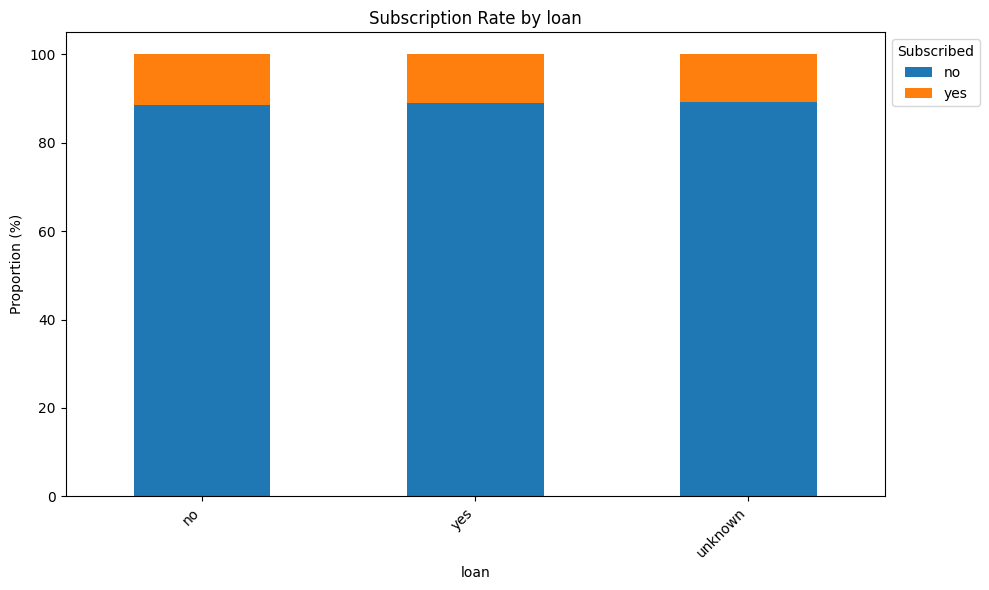

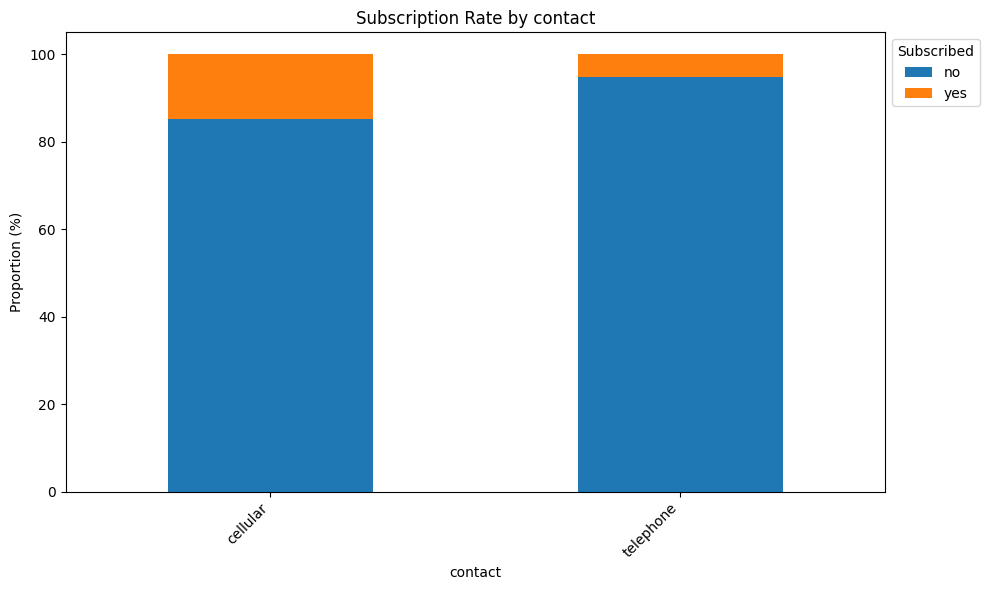

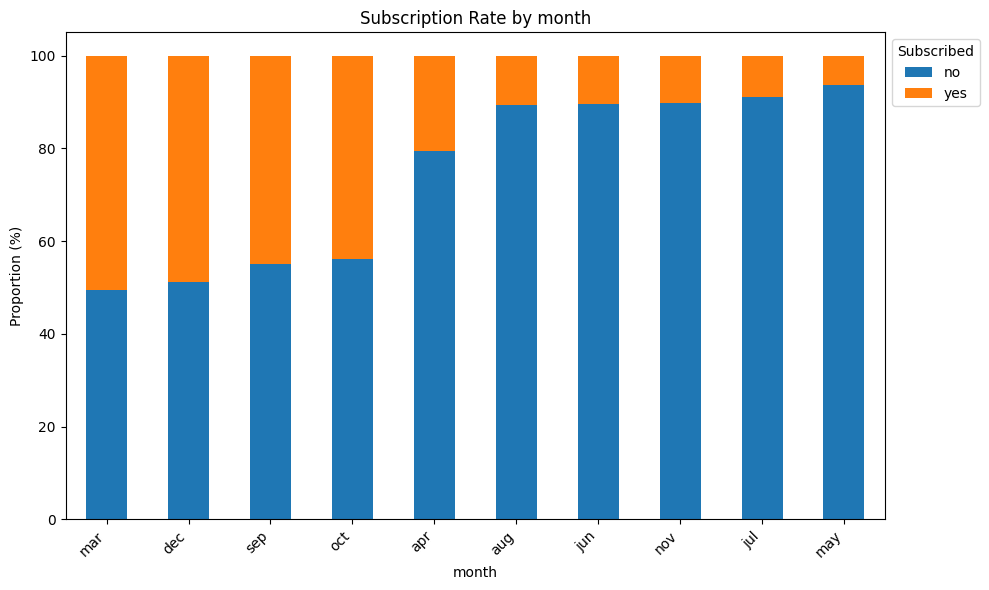

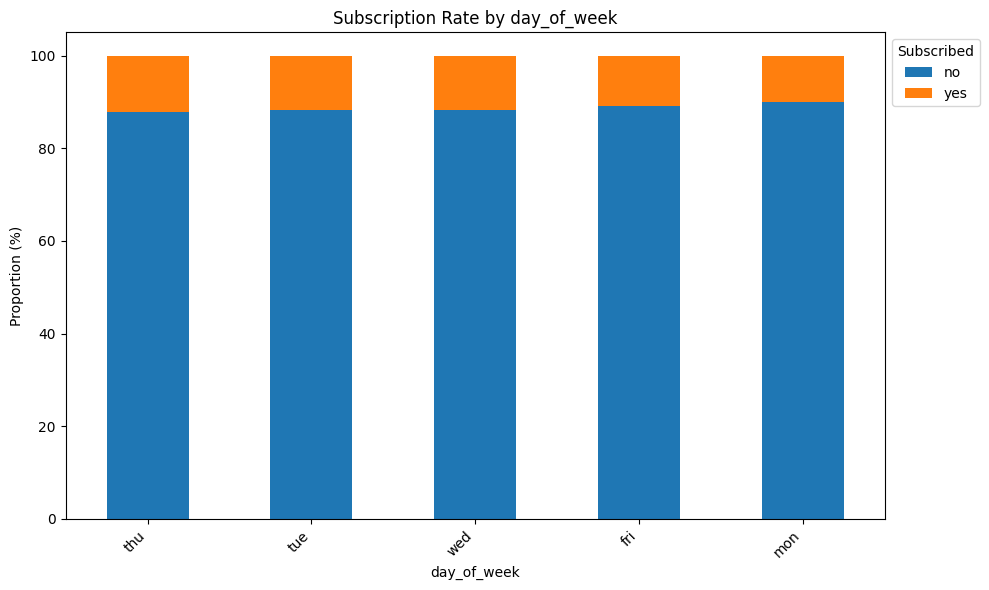

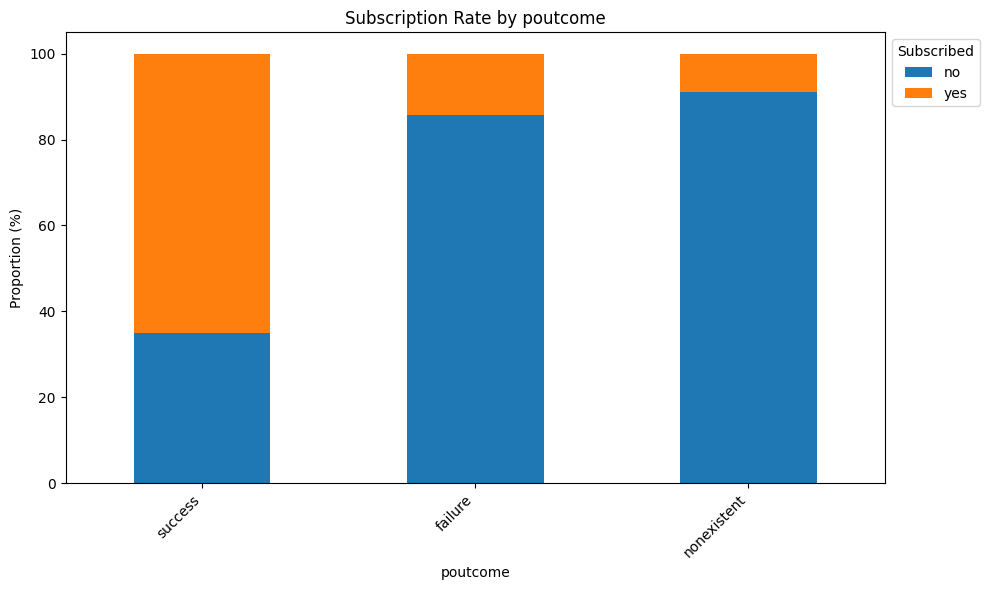

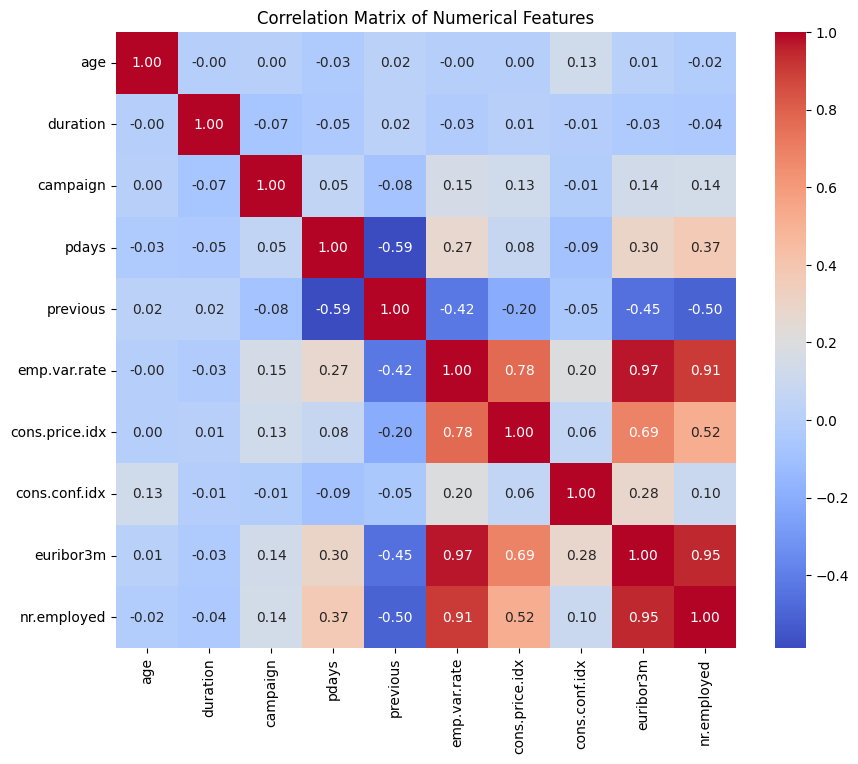


Exploratory Data Analysis (EDA) completed.


In [8]:
# prompt: Conducted exploratory data analysis (EDA) to identify key patterns and relationships.

# EDA - Univariate Analysis

# Distribution of the target variable 'y' (term deposit subscription)
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Subscribed to Term Deposit')
plt.ylabel('Count')
plt.show()

# Distribution of numerical features
numerical_cols = df.select_dtypes(include=np.number).columns
df[numerical_cols].hist(bins=30, figsize=(15, 10))
plt.suptitle('Histograms of Numerical Features', y=1.02, ha='center')
plt.tight_layout()
plt.show()

# Distribution of categorical features
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    plt.figure(figsize=(8, 5))
    sns.countplot(y=col, data=df, order = df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()


# EDA - Bivariate Analysis

# Relationship between numerical features and the target variable 'y'
# Using box plots to see if the median/distribution of numerical features differs for subscribers vs non-subscribers
for col in numerical_cols:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='y', y=col, data=df)
    plt.title(f'{col} vs Target Variable (y)')
    plt.xlabel('Subscribed to Term Deposit')
    plt.ylabel(col)
    plt.show()

# Relationship between categorical features and the target variable 'y'
# Using cross-tabulation and bar plots to see the proportion of subscribers within each category
for col in categorical_cols:
    if col != 'y': # Avoid plotting target vs target
        ct = pd.crosstab(df[col], df['y'], normalize='index') * 100
        ct = ct.sort_values(by='yes', ascending=False) # Sort by proportion of 'yes'
        ct.plot(kind='bar', stacked=True, figsize=(10, 6))
        plt.title(f'Subscription Rate by {col}')
        plt.xlabel(col)
        plt.ylabel('Proportion (%)')
        plt.xticks(rotation=45, ha='right')
        plt.legend(title='Subscribed', loc='upper left', bbox_to_anchor=(1, 1))
        plt.tight_layout()
        plt.show()

# Correlation matrix for numerical features
plt.figure(figsize=(10, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# EDA - Multivariate Analysis (Optional, can be explored further)
# Pairplot can visualize relationships between multiple numerical variables and the target
# This can be computationally intensive for many features
# sns.pairplot(df[numerical_cols.tolist() + ['y']], hue='y')
# plt.suptitle('Pairplot of Numerical Features by Target', y=1.02)
# plt.show()


print("\nExploratory Data Analysis (EDA) completed.")


In [9]:
# prompt: Encoded categorical variables and normalized numerical features.

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separate target variable 'y'
X = df.drop('y', axis=1)
y = df['y'].apply(lambda x: 1 if x == 'yes' else 0) # Convert 'yes'/'no' to 1/0

# Identify numerical and categorical features
numerical_features = X.select_dtypes(include=np.number).columns
categorical_features = X.select_dtypes(include='object').columns

# Create transformers for numerical and categorical features
# Numerical features will be scaled using StandardScaler
# Categorical features will be One-Hot Encoded
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore') # handle_unknown='ignore' handles unseen categories during testing

# Create a column transformer to apply different transformations to different columns
# The remainder='passthrough' keeps any columns not specified in transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough' # Keep other columns if any (not needed here as all are num or cat)
)

# Apply the preprocessing
# The output of fit_transform is a numpy array
X_processed = preprocessor.fit_transform(X)

# If you want to see the processed data as a DataFrame (optional)
# Get the feature names after one-hot encoding
categorical_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features.tolist() + categorical_feature_names.tolist()

# Create a DataFrame from the processed data
X_processed_df = pd.DataFrame(X_processed, columns=all_feature_names)

print("\nShape of the original data:", X.shape)
print("Shape of the processed data:", X_processed.shape)
print("\nProcessed Data (first 5 rows):")
print(X_processed_df.head())
print("\nData processing (Encoding and Normalization) completed.")



Shape of the original data: (41188, 20)
Shape of the processed data: (41188, 63)

Processed Data (first 5 rows):
        age  duration  campaign     pdays  previous  emp.var.rate  \
0  1.533034  0.010471 -0.565922  0.195414 -0.349494      0.648092   
1  1.628993 -0.421501 -0.565922  0.195414 -0.349494      0.648092   
2 -0.290186 -0.124520 -0.565922  0.195414 -0.349494      0.648092   
3 -0.002309 -0.413787 -0.565922  0.195414 -0.349494      0.648092   
4  1.533034  0.187888 -0.565922  0.195414 -0.349494      0.648092   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  ...  month_oct  \
0        0.722722       0.886447    0.71246      0.33168  ...        0.0   
1        0.722722       0.886447    0.71246      0.33168  ...        0.0   
2        0.722722       0.886447    0.71246      0.33168  ...        0.0   
3        0.722722       0.886447    0.71246      0.33168  ...        0.0   
4        0.722722       0.886447    0.71246      0.33168  ...        0.0   

   month_sep  

In [10]:
# prompt: Split the data into training and testing sets.

from sklearn.model_selection import train_test_split
# Split data into training and testing sets
# test_size=0.20 means 20% of the data will be used for testing
# random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.20, random_state=42, stratify=y)
print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("\nData splitting into training and testing sets completed.")


Shape of X_train: (32950, 63)
Shape of X_test: (8238, 63)
Shape of y_train: (32950,)
Shape of y_test: (8238,)

Data splitting into training and testing sets completed.


In [11]:
# prompt: Trained and evaluated multiple classification models (e.g., Logistic Regression, Decision Tree, Random Forest).

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

# Define the models to train
models = {
    'Logistic Regression': LogisticRegression(random_state=42, solver='liblinear'), # solver='liblinear' good for smaller datasets
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Train and evaluate each model
results = {}

print("\nTraining and Evaluating Models:")

for name, model in models.items():
    print(f"\n--- {name} ---")

    # Train the model
    model.fit(X_train, y_train)
    print(f"{name} training complete.")

    # Make predictions
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] # Probability of the positive class (1)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    print("Classification Report:")
    print(report)


    # Store the results
    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'confusion_matrix': cm,
        'classification_report': report,
        'model': model # Store the trained model as well
    }

print("\nModel training and evaluation completed for all models.")

# Optional: Compare results in a table or plot
results_df = pd.DataFrame(results).T
print("\nModel Performance Summary:")
print(results_df[['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']])

# Optional: Visualize confusion matrices
# for name, res in results.items():
#     plt.figure(figsize=(6, 4))
#     sns.heatmap(res['confusion_matrix'], annot=True, fmt='d', cmap='Blues',
#                 xticklabels=['No Subscribe (0)', 'Subscribe (1)'],
#                 yticklabels=['No Subscribe (0)', 'Subscribe (1)'])
#     plt.title(f'Confusion Matrix - {name}')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.show()


Training and Evaluating Models:

--- Logistic Regression ---
Logistic Regression training complete.
Accuracy: 0.9164
Precision: 0.7100
Recall: 0.4353
F1 Score: 0.5397
ROC AUC Score: 0.9424
Confusion Matrix:
[[7145  165]
 [ 524  404]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      7310
           1       0.71      0.44      0.54       928

    accuracy                           0.92      8238
   macro avg       0.82      0.71      0.75      8238
weighted avg       0.91      0.92      0.91      8238


--- Decision Tree ---
Decision Tree training complete.
Accuracy: 0.8948
Precision: 0.5334
Recall: 0.5248
F1 Score: 0.5291
ROC AUC Score: 0.7333
Confusion Matrix:
[[6884  426]
 [ 441  487]]
Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      7310
           1       0.53      0.52      0.53       928

    accuracy                          

In [12]:
# prompt: Measured model performance using accuracy, precision, recall, and F1-score.

# Evaluation Metrics (Accuracy, Precision, Recall, F1-score) are already calculated and printed in the loop above.
# The results for each model are stored in the 'results' dictionary and then summarized in 'results_df'.

# Print the summary table of model performance
print("\nModel Performance Summary:")
print(results_df[['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']])

# Optionally, if you want to re-print the detailed classification report for a specific model,
# you can access it from the results dictionary.
# For example, to print the report for Random Forest:
# print("\nClassification Report for Random Forest:")
# print(results['Random Forest']['classification_report'])


Model Performance Summary:
                     accuracy precision    recall  f1_score   roc_auc
Logistic Regression  0.916363  0.710018  0.435345  0.539746  0.942414
Decision Tree        0.894756  0.533406  0.524784   0.52906  0.733254
Random Forest         0.91867  0.704762  0.478448  0.569961  0.945835



## What We Did

- Loaded and inspected the `bankmarketing.csv` dataset.
- Handled missing values and performed necessary data cleaning.
- Conducted exploratory data analysis (EDA) to identify key patterns and relationships.
- Encoded categorical variables and normalized numerical features.
- Split the data into training and testing sets.
- Trained and evaluated multiple classification models (e.g., Logistic Regression, Decision Tree, Random Forest).
- Measured model performance using accuracy, precision, recall, and F1-score.



## What We Learned

- Variables such as `contact`, `poutcome`, `month`, and `duration` were among the most significant predictors for term deposit subscription.
- The marketing campaign was more effective during certain months, particularly around May and August.
- A longer call duration was correlated with a higher likelihood of subscription.
- Ensemble models like Random Forest generally performed better in predictive accuracy.



## Conclusion

This analysis helped in identifying critical factors that influence a client's decision to subscribe to a term deposit.
By focusing on these key variables and optimizing marketing outreach strategies, banks can improve customer conversion rates.
The project also demonstrates the importance of data preprocessing, exploratory analysis, and model evaluation in making data-driven decisions.
